# ESCI 445 - Exercise 5-B

## Calculating Vorticity, Vorticity Advection, and Geostrophic Wind Using Functions

### Import libraries

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

### Create function for calculating vorticity

In [41]:
def vorticity(stream, dd):
    '''Calculates vorticity on interior grid points, using the 5-pt Laplacian
    stencil.  Input is a 2D array of streamfunction, stream, and a floating-point value
    for the grid spacing, dd.
    Output is a 2D array of vorticity, with boundaries set to zero.'''
    
    nx, ny = np.shape(stream)  # Determines number of x and y grid points.
    zeta = np.zeros_like(stream)  # Creates vorticity array initialized to zero
    
    # Using explicit loops
    #for j in range(1, ny-1):
        #for i in range(1, nx-1):
            #zeta[i,j] = (stream[i+1, j] + stream[i-1,j] + 
                          #stream[i,j+1] + stream[i,j-1] 
                          #- 4*stream[i,j])/dd**2
    
    # Using implied loop
    zeta[1:nx-1,1:ny-1] = (stream[2:nx,1:ny-1]+stream[0:nx-2,1:ny-1] + \
                       stream[1:nx-1,2:ny]+stream[1:nx-1,0:ny-2] - \
                       4.0*stream[1:nx-1,1:ny-1])/dd**2
    
    return zeta

### <font color = 'blue'><i>*Create function for calculating Jacobian

In [42]:
# Input should be streamfunction, vorticity, and grid spacing
def Jacobian(stream, vort, dd):
    '''Calculates Jacobian on interior grid points, using the 5-pt Laplacian
    stencil.  Input is a 2D array of streamfunction, vorticity, and a floating-point value
    for the grid spacing, dd.
    Output is a 2D array of Jacobian, with boundaries set to zero.'''
    
    nx, ny = np.shape(stream)  # Determines number of x and y grid points.
    
    J1 = np.zeros_like(stream)
    J2 = np.zeros_like(stream)
    J3 = np.zeros_like(stream)
    
    J1[2:nx-2,2:ny-2] = (1 / (4 * d**2)) * ((psi[3:nx-1,2:ny-2]-psi[1:nx-3,2:ny-2])*(vort[2:nx-2,3:ny-1]-\
                                            vort[2:nx-2,1:ny-3]) - (psi[2:nx-2,3:ny-1]-psi[2:nx-2,1:ny-3])* \
                                            (vort[3:nx-1,2:ny-2]-vort[1:nx-3,2:ny-2]))
        
    J2[2:nx-2,2:ny-2] = (1 / (4 * d**2)) * (psi[3:nx-1,2:ny-2]*(vort[3:nx-1,3:ny-1]-vort[3:nx-1,1:ny-3]) - \
                                      psi[1:nx-3,2:ny-2]*(vort[1:nx-3,3:ny-1]-vort[1:nx-3,1:ny-3]) - \
                                      psi[2:nx-2,3:ny-1]*(vort[3:nx-1,3:ny-1]-vort[1:nx-3,3:ny-1]) + \
                                      psi[2:nx-2,1:ny-3]*(vort[3:nx-1,1:ny-3]-vort[1:nx-3,1:ny-3]))
        
    J3[2:nx-2,2:ny-2] = (1 / (4 * d**2)) * (vort[2:nx-2,3:ny-1]*(psi[3:nx-1,3:ny-1]-psi[1:nx-3,3:ny-1]) - \
                                      vort[2:nx-2,1:ny-3]*(psi[3:nx-1,1:ny-3]-psi[1:nx-3,1:ny-3]) - \
                                      vort[3:nx-1,2:ny-2]*(psi[3:nx-1,3:ny-1]-psi[3:nx-1,1:ny-3]) + \
                                      vort[1:nx-3,2:ny-2]*(psi[1:nx-3,3:ny-1]-psi[1:nx-3,1:ny-3]))
    
    return (J1 + J2 + J3) / 3

### <font color = 'blue'><i>*Create function for calculating v-component of Geostrophic wind

In [43]:
# Input should be streamfunction and grid spacing
def v_geo(stream, dd):
    '''Calculates v component of the geostrophic wind on interior grid points. 
    Input is a 2D array of streamfunction and a floating-point value
    for the grid spacing, dd.
    Output is a 2D array of geostropic wind, with boundaries set to zero.'''
    
    nx, ny = np.shape(stream)
    vgeo = np.zeros_like(stream)
    
    vgeo[1:nx-1,0:ny] = (stream[2:nx,0:ny] - stream[0:nx-2,0:ny]) / (2*dd)
    
    return vgeo

### Read in streamfunction data

In [44]:
filename = 'streamfunction_input.dat'

psi = np.loadtxt(filename, dtype = np.float64)
psi = np.transpose(psi)  #  Transposes to get into proper orientation

### Set up parameters

In [45]:
d = 5e4  # Grid spacing in meters

### Calculate Vorticity

In [46]:
vort = vorticity(psi, d)  #  Calls your vorticity function

### Calculate Jacobian

In [47]:
Jacob = Jacobian(psi, vort, d)  # Calls your Jacobian function

### Calculate v-component of Geostrophic Wind

In [48]:
v = v_geo(psi, d)  #  Calls your geostrophic wind function

### Create Plots

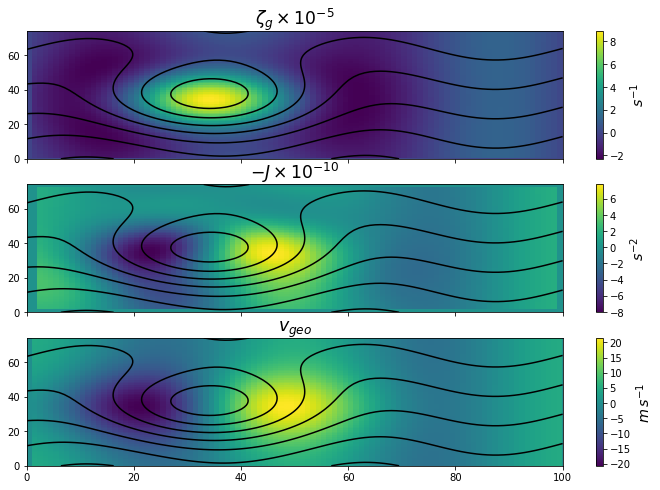

In [49]:
%matplotlib inline

rcParams['figure.figsize'] = (12.0, 8.0)

fig, ax = plt.subplots(3,1,sharex=True,sharey=True)

nx, ny = np.shape(psi) # Determine number of x and y grid points

#  Changes units and transpose for plotting
s_vort, s_J, s_v, s_psi= np.transpose(vort)*1e5, -np.transpose(Jacob)*1e10, np.transpose(v), np.transpose(psi)


pc0 = ax[0].pcolor(s_vort,vmin = np.min(s_vort), vmax = np.max(s_vort))
ax[0].set_xlim(0,nx-1)
ax[0].set_ylim(0,ny-1)
cb0 = plt.colorbar(pc0,ax = ax[0])
cb0.set_label(r'$s^{-1}$', size = 'x-large')
ax[0].contour(s_psi, colors = 'black')
ax[0].set_title(r'$\zeta_g\times 10^{-5}$', size = 'xx-large')

pc1 = ax[1].pcolor(s_J,vmin = np.min(s_J), vmax = np.max(s_J))
cb1 = plt.colorbar(pc1,ax = ax[1])
cb1.set_label(r'$s^{-2}$', size = 'x-large')
ax[1].contour(s_psi, colors = 'black')
ax[1].set_title(r'$-J\times 10^{-10}$', size = 'xx-large')

pc2 = ax[2].pcolor(s_v,vmin = np.min(s_v), vmax = np.max(s_v))
cb2 = plt.colorbar(pc2,ax = ax[2])
cb2.set_label(r'$m\/s^{-1}$', size = 'x-large')
ax[2].contour(s_psi, colors = 'black')
ax[2].set_title(r'$v_{geo}$', size = 'xx-large')

plt.show()